# P8 - Projet Titanic

In [346]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

We load in memory the train and test dataset

In [347]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

We show the five first line of train dataset

In [348]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We show the five first line of test dataset

In [349]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [350]:
train['Age'].isna().sum()

177

The age variable is of interest for our use case, however it has 177 NaN values

The other interesting variable is the gender however it is in string format

Let's give 0 to male and 1 to female

In [351]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

train['Sex'] = train['Sex'].map({ 'male': 0, 'female': 1 })
test['Sex'] = test['Sex'].map({ 'male': 0, 'female': 1 })

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [352]:
train['Age'].isna().sum()

0

We see that our code works quite well

Now we will remove the useless columns

In [353]:
train.drop(['PassengerId','Name','SibSp','Parch','Cabin','Embarked'],axis='columns',inplace=True)

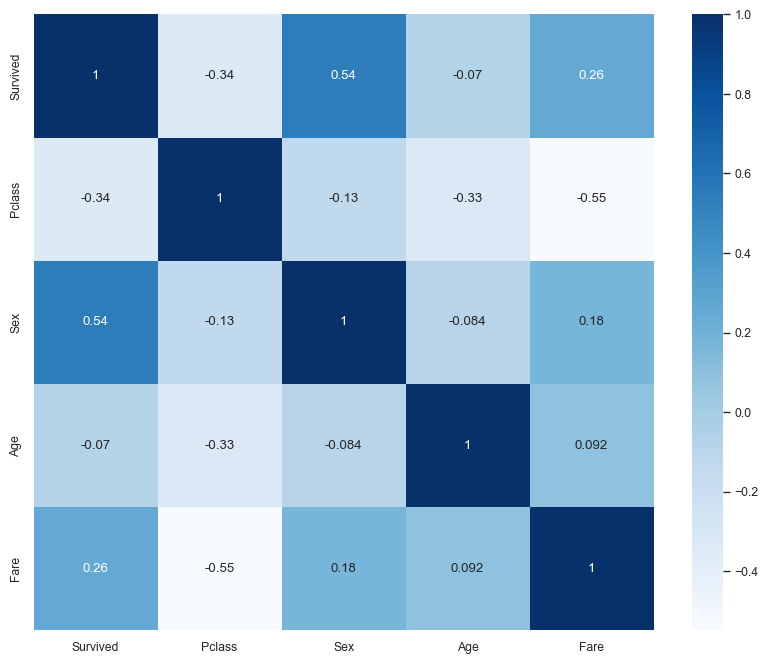

In [354]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap="Blues")
plt.show()

We are interested in the correlation of the variables
We notice that the correlation between the variables are not existing

In [355]:
X_train = train[['Pclass', 'Sex', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Sex', 'Age']]

In [356]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

We will now use the train_test_split function to split our train and test dataset

# GaussianNB

We use the GaussianNB model which is adapted when our data are not correlated between them

In [357]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.7910447761194029

We get a score of 0.79% which is very good

Now we can try another approach via logistic regression

# Logistic Regression

In [358]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Mean score: ", scores.mean())
y_test_pred = model.predict(X_test)

Accuracy:  0.7910447761194029
Cross-validation scores:  [0.768      0.744      0.768      0.81451613 0.86290323]
Mean score:  0.791483870967742


We obtain a score very similar to the GaussianNB model

We can export our dataset with prediction in csv

# Export final dataset

In [359]:
submission_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_test_pred})
submission_df.to_csv('submission.csv', index=False)